# Saratoga Juveniles Race Time Classification

#### Name: Cheng, Sydney S. 
#### Student number: 1780067
#### Class: Block B - Machine Learning
#### Instructor: Jonas Moons
#### Date: April 2nd, 2021

## 1. Introduction

The project aimed to classify Saratoga Juveniles race time results based on variables of race length, race surface type, trainer, jockey and sire of each horse. The end results provide a matrix to show which time range classification it is most likely to fit based on the data set from 2017 to 2019. 

The data set was downloaded from: https://horseracingdatasets.com/saratoga/

In this model, we neglect the betting aspect; therefore, the model excludes elements such as odds and favorite etc. Most of the horse race betting Machine Learning models I found online focus solely on the financial return. These model plays into the effect that "the odds of any given horse winning are directly related to the amount of money on [the horse]' (Aspen, 2020). This results into strategize a better approach to the betting probability than every other player. Our model only focuses on the variable of horse sire, surface condition, trainer, and jockey pairing aspect.

Considering the complexity of the data set and the large number of variables, the model uses Random Forest Classification method to derive results. The result shows a better prediction with shorter distance - between 5.5 to 7 furlongs - understandably, there are larger number of data set within these range.

## 2. Data Set

In [1]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import datetime
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import sys, warnings, os
from sklearn.dummy import DummyClassifier

In [2]:
#Convert excel file into CSV - specifically the sheet of "ALL STARTERS" from each year's file
#sara_19 = pd.read_excel (r'C:\Users\sydne\Documents\saratoga_futurewinner_prediction\2019 Saratoga Juveniles.xlsx', sheet_name = 'ALL STARTERS')
#sara_19.to_csv(r'C:\Users\sydne\Documents\saratoga_futurewinner_prediction\2019_allstarters.csv', index = False)

#Since we have all the csv files extract from xlsx, I decided to simplified the process for all the files and just use read_csv after converted all the files.
#2019 data in csv
data_19 = pd.read_csv('2019_allstarters.csv')
data_19.head()

,DATE,RACE,CLASS,RACE NAME,DIST,SURF,STARTER NAME,PP,ODDS,FAVE,FIN,TRAINER,JOCKEY,TIME,PREV RACE,DAYS,SIRE
0,7/11/2019,5,MSW-NY-F,NaN,5.5,Dirt,Big Q,5,14.00,0,1,Gary Gullo,Joel Rosario,01:06.9,NaN,NaN,Big Brown
1,7/11/2019,5,MSW-NY-F,NaN,5.5,Dirt,Impazible Donna,6,2.45,1,2,Bruce Levine,Luis Saez,01:07.0,NaN,NaN,Mission Impazible
2,7/11/2019,5,MSW-NY-F,NaN,5.5,Dirt,Funfetti,8,2.65,0,3,Jeremiah Englehart,Jose Ortiz,01:07.4,NaN,NaN,Giant Surprise
3,7/11/2019,5,MSW-NY-F,NaN,5.5,Dirt,Love Me Tomorrow,2,3.85,0,4,Wesley Ward,Dylan Davis,01:07.5,BEL 5/30 4,42.0,Mineshaft
4,7/11/2019,5,MSW-NY-F,NaN,5.5,Dirt,Keypit,7,29.50,0,5,Thomas Albertrani,Jose Lezcano,01:09.4,NaN,NaN,Congrats


In [3]:
#2018 data in csv
data_18 = pd.read_csv('2018_allstarters.csv')
data_18.head()

,DATE,RACE,CLASS,RACE NAME,DIST,SURF,STARTER NAME,PP,ODDS,FAVE,FIN,TRAINER,JOCKEY,TIME,PREV RACE,DAYS,SIRE
0,7/20/2018,2,MSW-NY-F,NaN,5.5,Turf,Drynachan,4,2.10,1,1.0,Chad Brown,Javier Castellano,01:03.3,NaN,NaN,City Zip
1,7/20/2018,2,MSW-NY-F,NaN,5.5,Turf,Shady Shady Shady,5,8.50,0,2.0,Michelle Nevin,John Velazquez,01:03.6,NaN,NaN,Hat Trick (JPN)
2,7/20/2018,2,MSW-NY-F,NaN,5.5,Turf,Molly's Party,7,33.25,0,3.0,John Kimmel,Jose Lezcano,01:03.8,NaN,NaN,Desert Party
3,7/20/2018,2,MSW-NY-F,NaN,5.5,Turf,Mike's Girl,9,4.40,0,4.0,Steven Asmussen,"Ricardo Santana, Jr.",01:03.8,NaN,NaN,Scat Daddy
4,7/20/2018,2,MSW-NY-F,NaN,5.5,Turf,Andarta,6,35.25,0,5.0,Thomas Albertrani,Luis Reyes,01:03.9,NaN,NaN,Declaration of War


In [4]:
#2017 data in csv
data_17 = pd.read_csv('2017_allstarters.csv')
data_17.head()

,RACE,DATE,CLASS,DIST,SURF,FIN,STARTER NAME,ODDS,FAV,JOCKEY,TRAINER,SIRE,BR-SIRE,TIME,EQB COMMENT,PREV RACE DATE,PREV TRACK,PREV RACE #,WATCH
0,2,7/21/2017,MSW-F-NY,5.5,T,1,Beaux Arts,2.55,Y,Angel Arroyo,Russell Cash,Freud,Sefapiano,01:04.3,"ins,ask 3/16,held late",6/23/2017,MTH,8.0,NaN
1,2,7/21/2017,MSW-F-NY,5.5,T,2,Lady of Miracles,7.60,NaN,Eric Cancel,Michael Miceli,Tueflesberg,Smart Strike,01:04.5,"2w,5p 1/8,good energy",NaN,NaN,NaN,NaN
2,2,7/21/2017,MSW-F-NY,5.5,T,3,Wanda Fay,3.25,NaN,Jose Ortiz,Michael Maker,Orientate,Broken Vow,01:04.7,"pocket to 1/8,outkick",7/1/2017,BEL,5.0,NaN
3,2,7/21/2017,MSW-F-NY,5.5,T,4,Scatback,2.60,NaN,Joel Rosario,Carlos Martin,Scat Daddy,Came Home,01:05.0,"3w & pull left,4w 1/8",NaN,NaN,NaN,NaN
4,2,7/21/2017,MSW-F-NY,5.5,T,5,Centr of the Stage,11.00,NaN,"Irad Ortiz, Jr.",Rudy Rodriguez,Algorithms,Yonaguska,01:05.4,"unsettle 9/16,2w,5p1/8",6/22/2017,BEL,4.0,NaN


Since all the columns and rows from 2017 to 2019 are different (see the list below), we will concatenate the columns that we will be using to set up the new dataframe to further process.

* 2019 - 720 rows × 17 columns
* 2018 - 661 rows × 17 columns
* 2017 - 640 rows × 19 columns


In [5]:
#Concatenate all relevant columns together from 2017-2019's sheets, join only columns that exist on all three files.
data_newset = pd.concat([data_19, data_18, data_17], join="inner")
data_newset

,DATE,RACE,CLASS,DIST,SURF,STARTER NAME,ODDS,FIN,TRAINER,JOCKEY,TIME,SIRE
0,7/11/2019,5,MSW-NY-F,5.5,Dirt,Big Q,14.00,1.0,Gary Gullo,Joel Rosario,01:06.9,Big Brown
1,7/11/2019,5,MSW-NY-F,5.5,Dirt,Impazible Donna,2.45,2.0,Bruce Levine,Luis Saez,01:07.0,Mission Impazible
2,7/11/2019,5,MSW-NY-F,5.5,Dirt,Funfetti,2.65,3.0,Jeremiah Englehart,Jose Ortiz,01:07.4,Giant Surprise
3,7/11/2019,5,MSW-NY-F,5.5,Dirt,Love Me Tomorrow,3.85,4.0,Wesley Ward,Dylan Davis,01:07.5,Mineshaft
4,7/11/2019,5,MSW-NY-F,5.5,Dirt,Keypit,29.50,5.0,Thomas Albertrani,Jose Lezcano,01:09.4,Congrats
...,...,...,...,...,...,...,...,...,...,...,...,...
635,9/4/2017,9,GRD,7.0,D,Firenze Fire,8.30,4.0,Jason Servis,"Irad Ortiz, Jr.",01:24.4,Poseidon's Warrior
636,9/4/2017,9,GRD,7.0,D,National Flag,5.10,5.0,Todd Pletcher,Jose Ortiz,01:24.9,Speightstown
637,9/4/2017,9,GRD,7.0,D,Oskar Blues,7.50,6.0,Kenneth McPeek,Dylan Davis,01:26.6,Speightstown
638,9/4/2017,9,GRD,7.0,D,Mojovation,3.30,7.0,Todd Pletcher,John Velazquez,01:26.8,Quality Road


In [6]:
#Fixed the inconsistancy with labelling in the "Surf" cell
data_newset = data_newset.replace(to_replace ="D", value ="Dirt")
data_newset = data_newset.replace(to_replace = "T", value = "Turf")

#Double-check with columns that used to be marked incorrectly
#example row 1930 to 1940 used to be "T"
data_newset.iloc[1930:1940]

,DATE,RACE,CLASS,DIST,SURF,STARTER NAME,ODDS,FIN,TRAINER,JOCKEY,TIME,SIRE
549,9/1/2017,2,MSW-F,5.5,Turf,Brattata,2.10,2.0,Chad Brown,Jose Ortiz,01:02.5,More Than Ready
550,9/1/2017,2,MSW-F,5.5,Turf,Radiant Beauty,6.00,3.0,Rudy Rodriguez,"Irad Ortiz, Jr.",01:02.7,Orb
551,9/1/2017,2,MSW-F,5.5,Turf,Lady Blessings,45.75,4.0,Thomas Morley,Kendrick Carmouche,01:03.1,Shanghai Bobby
552,9/1/2017,2,MSW-F,5.5,Turf,Souper Striking,16.00,5.0,Michael Trombetta,Jose Lezcano,01:03.2,Brilliant Speed
553,9/1/2017,2,MSW-F,5.5,Turf,Puttinyouonthenews,4.70,6.0,Steven Asmussen,"Ricardo Santana, Jr.",01:03.3,Violence
554,9/1/2017,2,MSW-F,5.5,Turf,Lyrical Tale,21.60,7.0,Thomas Morley,Rajiv Maragh,01:03.4,Tale of the Cat
555,9/1/2017,2,MSW-F,5.5,Turf,Mermaid of Honor,9.30,8.0,Ralph Nicks,Manuel Franco,01:03.4,Majestic Warrior
556,9/1/2017,2,MSW-F,5.5,Turf,Talk Softly,6.40,9.0,Christophe Clement,Florent Geroux,01:03.7,Malibu Moon
557,9/1/2017,2,MSW-F,5.5,Turf,Ad In,32.50,10.0,"George Arnold, II",Christopher DeCarlo,01:05.6,Street Cry (IRE)
558,9/2/2017,2,MSW,8.5,Turf,Maraud,1.45,1.0,Todd Pletcher,John Velazquez,01:41.8,Blame


In [7]:
#After trying out dataset we notixed there are some blank cells under the column "TIME"
#Therefore, we dropped rows that have no values in "TIME"  and double-check the files
data_newset = data_newset.dropna(subset = ['TIME'])
data_newset

,DATE,RACE,CLASS,DIST,SURF,STARTER NAME,ODDS,FIN,TRAINER,JOCKEY,TIME,SIRE
0,7/11/2019,5,MSW-NY-F,5.5,Dirt,Big Q,14.00,1.0,Gary Gullo,Joel Rosario,01:06.9,Big Brown
1,7/11/2019,5,MSW-NY-F,5.5,Dirt,Impazible Donna,2.45,2.0,Bruce Levine,Luis Saez,01:07.0,Mission Impazible
2,7/11/2019,5,MSW-NY-F,5.5,Dirt,Funfetti,2.65,3.0,Jeremiah Englehart,Jose Ortiz,01:07.4,Giant Surprise
3,7/11/2019,5,MSW-NY-F,5.5,Dirt,Love Me Tomorrow,3.85,4.0,Wesley Ward,Dylan Davis,01:07.5,Mineshaft
4,7/11/2019,5,MSW-NY-F,5.5,Dirt,Keypit,29.50,5.0,Thomas Albertrani,Jose Lezcano,01:09.4,Congrats
...,...,...,...,...,...,...,...,...,...,...,...,...
635,9/4/2017,9,GRD,7.0,Dirt,Firenze Fire,8.30,4.0,Jason Servis,"Irad Ortiz, Jr.",01:24.4,Poseidon's Warrior
636,9/4/2017,9,GRD,7.0,Dirt,National Flag,5.10,5.0,Todd Pletcher,Jose Ortiz,01:24.9,Speightstown
637,9/4/2017,9,GRD,7.0,Dirt,Oskar Blues,7.50,6.0,Kenneth McPeek,Dylan Davis,01:26.6,Speightstown
638,9/4/2017,9,GRD,7.0,Dirt,Mojovation,3.30,7.0,Todd Pletcher,John Velazquez,01:26.8,Quality Road


## 3. Featured Engineering

Now that all values are relevant and set up nicely in the updated dataframe, we can process all categorical values into get.dummies and turn each categorical variable into boolean for further processing.

## Turning categorial variables into boolean (get.dummies())

In [8]:
data_DIST = pd.get_dummies(data_newset['DIST'])
#data_DIST.head()

In [9]:
data_newset_surf = pd.get_dummies(data_newset['SURF'])
#data_newset_surf.head

In [10]:
data_newset_starter = pd.get_dummies(data_newset['STARTER NAME'])
#data_newset_starter.head()

In [11]:
data_newset_trainer = pd.get_dummies(data_newset['TRAINER'])
#data_newset_trainer.head

In [12]:
data_newset_jockey = pd.get_dummies(data_newset['JOCKEY'])
#data_newset_jockey.head

In [13]:
data_newset_sire = pd.get_dummies(data_newset['SIRE'])
#data_newset_sire.head

## Append dummies back to main dataframe

In [14]:
frame = [data_newset, data_DIST, data_newset_surf, data_newset_starter, data_newset_trainer, data_newset_jockey, data_newset_sire]

In [15]:
#all get.dummies are concat back to main dataframe
results = pd.concat(frame, axis = 1)
results

,DATE,RACE,CLASS,DIST,SURF,STARTER NAME,ODDS,FIN,TRAINER,JOCKEY,...,Warrior's Reward,Wicked Strong,Wilburn,Wilcox Inn,Wildcat Heir,Will Take Charge,With Distinction,Yes It's True,Zensational,Zoffany (IRE)
0,7/11/2019,5,MSW-NY-F,5.5,Dirt,Big Q,14.00,1.0,Gary Gullo,Joel Rosario,...,0,0,0,0,0,0,0,0,0,0
1,7/11/2019,5,MSW-NY-F,5.5,Dirt,Impazible Donna,2.45,2.0,Bruce Levine,Luis Saez,...,0,0,0,0,0,0,0,0,0,0
2,7/11/2019,5,MSW-NY-F,5.5,Dirt,Funfetti,2.65,3.0,Jeremiah Englehart,Jose Ortiz,...,0,0,0,0,0,0,0,0,0,0
3,7/11/2019,5,MSW-NY-F,5.5,Dirt,Love Me Tomorrow,3.85,4.0,Wesley Ward,Dylan Davis,...,0,0,0,0,0,0,0,0,0,0
4,7/11/2019,5,MSW-NY-F,5.5,Dirt,Keypit,29.50,5.0,Thomas Albertrani,Jose Lezcano,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,9/4/2017,9,GRD,7.0,Dirt,Firenze Fire,8.30,4.0,Jason Servis,"Irad Ortiz, Jr.",...,0,0,0,0,0,0,0,0,0,0
636,9/4/2017,9,GRD,7.0,Dirt,National Flag,5.10,5.0,Todd Pletcher,Jose Ortiz,...,0,0,0,0,0,0,0,0,0,0
637,9/4/2017,9,GRD,7.0,Dirt,Oskar Blues,7.50,6.0,Kenneth McPeek,Dylan Davis,...,0,0,0,0,0,0,0,0,0,0
638,9/4/2017,9,GRD,7.0,Dirt,Mojovation,3.30,7.0,Todd Pletcher,John Velazquez,...,0,0,0,0,0,0,0,0,0,0


In [16]:
#since we turned all categorical variables into boolean we no longer need the original categorical variables cloumns
results = results.drop(['DATE', 'RACE', 'CLASS', 'DIST', 'SURF', 'STARTER NAME', 'ODDS', 'TRAINER', 'JOCKEY', 'SIRE'], axis = 1)
results

,FIN,TIME,5.5,6.0,6.5,7.0,8.5,9.0,Dirt,Turf,...,Warrior's Reward,Wicked Strong,Wilburn,Wilcox Inn,Wildcat Heir,Will Take Charge,With Distinction,Yes It's True,Zensational,Zoffany (IRE)
0,1.0,01:06.9,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,01:07.0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,01:07.4,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4.0,01:07.5,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5.0,01:09.4,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,4.0,01:24.4,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
636,5.0,01:24.9,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
637,6.0,01:26.6,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
638,7.0,01:26.8,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## Converting time format into numerical values 

After some testing of the code, I was getting error such as "could not convert string to float: '01:06.9'". To solve this I need to go back to the "results" dataframe and convert the column of "TIME" into integer representation. Such that each cell's minutes and seconds would be in milliseconds (representing by one number).

In [17]:
#original 'TIME' dataframe
print (results['TIME'])

0      01:06.9
1      01:07.0
2      01:07.4
3      01:07.5
4      01:09.4
        ...   
635    01:24.4
636    01:24.9
637    01:26.6
638    01:26.8
639    01:26.9
Name: TIME, Length: 2014, dtype: object


In [18]:
#Converting MM:SS.s into millisecond format
def convert_time(t): #t is a time str corresponding to the cell
    # 1 minute = 60 seconds = 60000 milliseconds
    # 1 second = 1000 milliseconds
    x = int(t[0]) * 10 * 60000 + int(t[1]) * 60000 + int(t[3]) * 10 * 1000 + int(t[4]) * 1000 + int(t[6])
    return x
        
list_ms = [ ]
                                  
for p in results['TIME']:
    total_ms = convert_time(p)
    list_ms.append(total_ms)
    
#append values that we calculated in previous steps into the empty list and replace the original 'TIME' column with the new list/values
results['TIME'] = list_ms
results.head()

<ipython-input-18-cdd810d43177>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['TIME'] = list_ms


,FIN,TIME,5.5,6.0,6.5,7.0,8.5,9.0,Dirt,Turf,...,Warrior's Reward,Wicked Strong,Wilburn,Wilcox Inn,Wildcat Heir,Will Take Charge,With Distinction,Yes It's True,Zensational,Zoffany (IRE)
0,1.0,66009,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,67000,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,67004,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4.0,67005,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5.0,69004,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
#showing all columns' names for visualization
#for i in results.columns:
#    print (i)

Originally I used 'time per furlong' to streamline basic unit of race distance, but once "different horses are built for different races" became relevant, I decided to turn race distance('DIST') as categorical values and use dummies' to set up my data. 

In [20]:
#results['Time per distance'] = results['TIME']/results['DIST']
#results

Since distance unit is in furlong (https://horseracingsense.com/what-is-furlong-why-used-horse-racing-reason/) we have the following conversion as a benchmark:
* 1 furlong equals:
= one-eighth of a mile
= 220 yards
= 660 feet
= 0.2 kilometer
= 201.1 meters

In this project, we will be looking at the following distances; to get a sense of the distance, I have converted the furlongs used in races into metric system.
Here's the conversion tool: http://extraconversion.com/length/furlongs/furlongs-to-kilometers.html
* 5.5 furlongs = 1.106424 km
* 6 furlongs = 1.207008 km
* 6.5 furlongs = 1.307592 km
* 7 furlongs = 1.408176 km
* 8.5 furlongs = 1.709928 km
* 9 furlongs = 1.810512 km

In [21]:
#Minimum race time in milliseconds
min(results['TIME'])

61001

In [22]:
#Maximum race time in milliseconds
max(results['TIME'])

114001

To have a better visualization we plotted the time range of the race results

<AxesSubplot:>

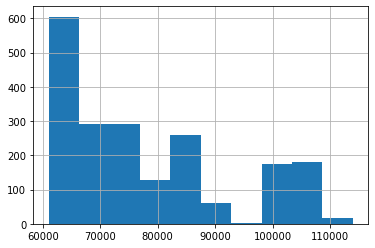

In [23]:
#visualization for range
plt.figure()
results['TIME'].hist()

From the result, we see that this is not a even distribution, the graph skew to the left and shows that a lot of races finished between 60000 to 80000 milliseconds. Also the range from 95000 to 100000 does not have any result.

## Set range for classification

In [24]:
bins = [60000, 65000, 70000, 75000, 80000, 85000, 90000, 95000, 100000, 105000, 110000, 115000]
names = ['1.00~1.08 mins', '1.09~1.16 mins', '1.17~1.25 mins', '1.26~1.33 mins', '1.34~1.42 mins', '1.43~1.50 mins',
        '1.51~1.58 mins', '1.59~1.67 mins', '1.68~1.75 mins', '1.76~1.83 mins', '1.84~1.91 mins'] 

results['TIMERange'] = pd.cut(results['TIME'], bins, labels=names)

print(results['TIMERange'])

0      1.09~1.16 mins
1      1.09~1.16 mins
2      1.09~1.16 mins
3      1.09~1.16 mins
4      1.09~1.16 mins
            ...      
635    1.34~1.42 mins
636    1.34~1.42 mins
637    1.43~1.50 mins
638    1.43~1.50 mins
639    1.43~1.50 mins
Name: TIMERange, Length: 2014, dtype: category
Categories (11, object): ['1.00~1.08 mins' < '1.09~1.16 mins' < '1.17~1.25 mins' < '1.26~1.33 mins' ... '1.59~1.67 mins' < '1.68~1.75 mins' < '1.76~1.83 mins' < '1.84~1.91 mins']


<ipython-input-24-01d5dac2e219>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['TIMERange'] = pd.cut(results['TIME'], bins, labels=names)


In [25]:
results['TIMERange'].unique()

['1.09~1.16 mins', '1.17~1.25 mins', '1.26~1.33 mins', '1.00~1.08 mins', '1.76~1.83 mins', '1.43~1.50 mins', '1.51~1.58 mins', '1.68~1.75 mins', '1.34~1.42 mins', '1.84~1.91 mins']
Categories (10, object): ['1.00~1.08 mins' < '1.09~1.16 mins' < '1.17~1.25 mins' < '1.26~1.33 mins' ... '1.51~1.58 mins' < '1.68~1.75 mins' < '1.76~1.83 mins' < '1.84~1.91 mins']

## Create Training and Test Data

In [26]:
# Create a new column that for each row, generates a random number between 0 and 1, and
# if that value is less than or equal to .75, then sets the value of that cell as True and false otherwise.
results['is_train'] = np.random.uniform(0, 1, len(results)) <= .75
results

<ipython-input-26-fb253673ec3d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['is_train'] = np.random.uniform(0, 1, len(results)) <= .75


,FIN,TIME,5.5,6.0,6.5,7.0,8.5,9.0,Dirt,Turf,...,Wilburn,Wilcox Inn,Wildcat Heir,Will Take Charge,With Distinction,Yes It's True,Zensational,Zoffany (IRE),TIMERange,is_train
0,1.0,66009,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1.09~1.16 mins,True
1,2.0,67000,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1.09~1.16 mins,False
2,3.0,67004,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1.09~1.16 mins,False
3,4.0,67005,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1.09~1.16 mins,True
4,5.0,69004,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1.09~1.16 mins,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,4.0,84004,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1.34~1.42 mins,True
636,5.0,84009,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1.34~1.42 mins,True
637,6.0,86006,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1.43~1.50 mins,True
638,7.0,86008,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1.43~1.50 mins,True


In [27]:
# Create two new dataframes, one with the training rows, one with the test rows
train, test = results[results['is_train'] == True], results[results['is_train'] == False]

In [28]:
# Show the number of observations for the test and training dataframes
print('Number of observations in the training data:', len(train))
print('Number of observations in the test data:', len(test))

Number of observations in the training data: 1535
Number of observations in the test data: 479


## Preprocess Data

In [29]:
# Create a list of the feature column's names
#Note on data: 'trainer' from line 10-204 and 'jockey' from line 205-271
features = results.columns[2:2056] 
features

Index([               5.5,                6.0,                6.5,
                      7.0,                8.5,                9.0,
                   'Dirt',             'Turf',  'A Freud of Mama',
         'A I Initiative',
       ...
       'Warrior's Reward',    'Wicked Strong',          'Wilburn',
             'Wilcox Inn',     'Wildcat Heir', 'Will Take Charge',
       'With Distinction',    'Yes It's True',      'Zensational',
          'Zoffany (IRE)'],
      dtype='object', length=2054)

In [30]:
#Time is what we are predicting
y = pd.factorize(train['TIMERange'])[0]
y
print (len(y))

1535


## Train the Random Forest Classifier

In [31]:
# Create a random forest Classifier. By convention, clf means 'Classifier'
clf = RandomForestClassifier(n_jobs = -1, random_state=0)

# Train the Classifier to take the training features and learn how they relate
# to the training y (the species)
clf.fit(train[features], y)

RandomForestClassifier(n_jobs=-1, random_state=0)

## Apply Classifier To Test Data

In [32]:
# Apply the Classifier we trained to the test data (which, remember, it has never seen before)
clf.predict(test[features])

array([0, 0, 0, 1, 1, 1, 1, 0, 7, 7, 7, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 3, 3, 1, 5, 5, 5, 5, 5, 5, 0, 0, 0, 5, 0, 0, 7,
       7, 1, 1, 1, 1, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 3, 3, 3, 7, 7, 8, 5,
       5, 5, 7, 7, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 7, 7, 7, 1, 1, 1, 1,
       2, 2, 7, 7, 7, 7, 7, 1, 1, 1, 1, 1, 1, 7, 3, 3, 3, 3, 3, 3, 3, 5,
       5, 2, 2, 2, 0, 2, 2, 0, 0, 5, 5, 9, 3, 3, 3, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 3, 3, 1, 3, 1, 1, 2, 1, 1, 3, 3, 3, 0, 0, 0, 7, 7, 8, 7, 3,
       3, 3, 0, 7, 7, 8, 5, 5, 8, 3, 0, 1, 1, 7, 0, 0, 0, 0, 1, 4, 7, 7,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 1, 1, 1, 5, 5, 5,
       1, 5, 5, 1, 1, 4, 4, 4, 4, 5, 5, 3, 3, 3, 5, 5, 5, 2, 2, 5, 2, 2,
       2, 3, 3, 1, 2, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 1, 1,
       3, 3, 3, 3, 5, 5, 1, 1, 1, 1, 7, 7, 7, 1, 1, 3, 3, 3, 3, 0, 0, 1,
       1, 1, 1, 7, 7, 7, 3, 3, 7, 7, 7, 7, 7, 2, 2, 1, 4, 7, 7, 7, 7, 7,
       7, 1, 1, 8, 3, 8, 7, 0, 7, 7, 3, 3, 3, 5, 5,

In [33]:
# View the predicted probabilities of the first observation
clf.predict_proba(test[features])[0:2]

array([[0.86, 0.04, 0.  , 0.09, 0.  , 0.  , 0.  , 0.  , 0.01, 0.  ],
       [0.88, 0.01, 0.01, 0.1 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]])

## 4. Predictive Model

## Improvement

Noticed that there are only 10 classification perdiction, I went back to look at the data and realized one of my classification range did not have any data (1.59~1.67 mins), therefore the classification results took out this range completely. To improve this problem, we consolidate the classification range into a broader term. Turn 11 classification groups to 7 classification groups and run the classification again.

## Set range for classification - 2

Student number: 1780067

In [34]:
bins_2 = [60000, 70000, 80000, 90000, 100000, 110000, 120000]
names_2 = ['1.00~1.16 mins', '1.17~1.33 mins', '1.34~1.50 mins',  '1.51~1.67 mins', '1.68~1.83 mins', '1.84~2.07 mins'] 

results['TIMERange'] = pd.cut(results['TIME'], bins_2, labels=names_2)

print(results['TIMERange'])

0      1.00~1.16 mins
1      1.00~1.16 mins
2      1.00~1.16 mins
3      1.00~1.16 mins
4      1.00~1.16 mins
            ...      
635    1.34~1.50 mins
636    1.34~1.50 mins
637    1.34~1.50 mins
638    1.34~1.50 mins
639    1.34~1.50 mins
Name: TIMERange, Length: 2014, dtype: category
Categories (6, object): ['1.00~1.16 mins' < '1.17~1.33 mins' < '1.34~1.50 mins' < '1.51~1.67 mins' < '1.68~1.83 mins' < '1.84~2.07 mins']


<ipython-input-34-04df6b304065>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['TIMERange'] = pd.cut(results['TIME'], bins_2, labels=names_2)


In [35]:
results['TIMERange'].unique()

['1.00~1.16 mins', '1.17~1.33 mins', '1.68~1.83 mins', '1.34~1.50 mins', '1.51~1.67 mins', '1.84~2.07 mins']
Categories (6, object): ['1.00~1.16 mins' < '1.17~1.33 mins' < '1.34~1.50 mins' < '1.51~1.67 mins' < '1.68~1.83 mins' < '1.84~2.07 mins']

## Create Training and Test Data - 2

In [36]:
results['is_train'] = np.random.uniform(0, 1, len(results)) <= .75

<ipython-input-36-34f52f50147a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['is_train'] = np.random.uniform(0, 1, len(results)) <= .75


In [37]:
train, test = results[results['is_train'] == True], results[results['is_train'] == False]

In [38]:
print('Number of observations in the training data:', len(train))
print('Number of observations in the test data:', len(test))

Number of observations in the training data: 1520
Number of observations in the test data: 494


## Preprocess Data - 2

In [39]:
features = results.columns[2:2056] 
features

Index([               5.5,                6.0,                6.5,
                      7.0,                8.5,                9.0,
                   'Dirt',             'Turf',  'A Freud of Mama',
         'A I Initiative',
       ...
       'Warrior's Reward',    'Wicked Strong',          'Wilburn',
             'Wilcox Inn',     'Wildcat Heir', 'Will Take Charge',
       'With Distinction',    'Yes It's True',      'Zensational',
          'Zoffany (IRE)'],
      dtype='object', length=2054)

In [40]:
y = pd.factorize(train['TIMERange'])[0]
y

array([0, 0, 0, ..., 3, 3, 3], dtype=int64)

## Train the Random Forest Classifier - 2

In [41]:
# Create a random forest Classifier. By convention, clf means 'Classifier'
clf = RandomForestClassifier(n_jobs = -1, random_state=0)

# Train the Classifier to take the training features and learn how they relate
# to the training y
clf.fit(train[features], y)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [42]:
clf.predict(test[features])

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 3, 0, 0, 3, 3, 3, 0, 0, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 3, 3, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2,
       2, 0, 0, 0, 1, 1, 1, 0, 0, 0, 2, 2, 2, 2, 0, 0, 3, 3, 1, 3, 0, 1,
       1, 0, 0, 0, 3, 3, 3, 5, 5, 5, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 2, 2, 1, 1, 1, 1, 1, 2, 2, 0, 0, 0, 0, 2, 3,
       3, 3, 3, 3, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 2, 2, 2, 2, 0, 0, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 3, 3, 3, 3, 3, 3, 1, 0, 0, 0, 3, 1,
       1, 2, 2, 3, 3, 3, 0, 0, 0, 0, 0, 0, 3, 1, 1, 1, 3, 3, 3, 3, 1, 1,
       1, 1, 3, 3, 3, 3, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 3, 3, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 2, 2, 2, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2,

In [43]:
clf.predict_proba(test[features])[0:10]

array([[0.99, 0.01, 0.  , 0.  , 0.  , 0.  ],
       [0.89, 0.11, 0.  , 0.  , 0.  , 0.  ],
       [0.98, 0.01, 0.  , 0.01, 0.  , 0.  ],
       [0.01, 0.98, 0.  , 0.01, 0.  , 0.  ],
       [0.01, 0.96, 0.  , 0.03, 0.  , 0.  ],
       [0.01, 0.95, 0.  , 0.03, 0.01, 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.89, 0.1 , 0.  , 0.01, 0.  , 0.  ],
       [0.02, 0.9 , 0.  , 0.08, 0.  , 0.  ],
       [0.03, 0.95, 0.01, 0.  , 0.  , 0.01]])

From this prediction of classification, it shows that the dataset is proned to be classified into the first two groups of time ('1.00 to 1.16 mins' & '1.17 to 1.33 mins'). In fact, out of the 10 predictions that we displayed here, only 1 result has a diffferent classification results than the rest. This can be attributed to the fact that more data were supplied in these two groups.

## 5. Analysis

## Evaluate Classifier

In [44]:
preds = []
for i in clf.predict(test[features]):
    preds.append(names_2[i])
test['PREDICTED TIMERange'] = preds

<ipython-input-44-0b2b24c59842>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['PREDICTED TIMERange'] = preds


In [45]:
# View the ACTUAL species for the first five observations
test['TIMERange'].head()

0     1.00~1.16 mins
3     1.00~1.16 mins
8     1.17~1.33 mins
9     1.17~1.33 mins
12    1.17~1.33 mins
Name: TIMERange, dtype: category
Categories (6, object): ['1.00~1.16 mins' < '1.17~1.33 mins' < '1.34~1.50 mins' < '1.51~1.67 mins' < '1.68~1.83 mins' < '1.84~2.07 mins']

In [46]:
test['PREDICTED TIMERange']

0      1.00~1.16 mins
3      1.00~1.16 mins
8      1.00~1.16 mins
9      1.17~1.33 mins
12     1.17~1.33 mins
            ...      
622    1.51~1.67 mins
625    1.17~1.33 mins
627    1.17~1.33 mins
633    1.51~1.67 mins
639    1.51~1.67 mins
Name: PREDICTED TIMERange, Length: 494, dtype: object

In [47]:
test['TIMERange']

0      1.00~1.16 mins
3      1.00~1.16 mins
8      1.17~1.33 mins
9      1.17~1.33 mins
12     1.17~1.33 mins
            ...      
622    1.51~1.67 mins
625    1.17~1.33 mins
627    1.17~1.33 mins
633    1.34~1.50 mins
639    1.34~1.50 mins
Name: TIMERange, Length: 494, dtype: category
Categories (6, object): ['1.00~1.16 mins' < '1.17~1.33 mins' < '1.34~1.50 mins' < '1.51~1.67 mins' < '1.68~1.83 mins' < '1.84~2.07 mins']

In [48]:
# Create confusion matrix
pd.crosstab(test['TIMERange'], test['PREDICTED TIMERange'], rownames=['Actual Time Range'], colnames=['Predicted Time Range'])

Predicted Time Range,1.00~1.16 mins,1.17~1.33 mins,1.34~1.50 mins,1.51~1.67 mins,1.84~2.07 mins
Actual Time Range,,,,,
1.00~1.16 mins,177,4,0,0,0
1.17~1.33 mins,5,131,0,0,0
1.34~1.50 mins,0,15,2,62,0
1.51~1.67 mins,0,0,0,6,0
1.68~1.83 mins,0,0,89,0,0
1.84~2.07 mins,0,0,0,0,3


This confusion matrix shows a somewhat interesting results. The predicted time range of the first two groups have a very high probability of correctly predicting the outcomes. But the two group comes after (1.34~1.50 mins; 1.51~1.67 mins) both have extremently inaccurate results. I suspect that this is due to not having enough data in these time range, which is shown in the bar graph from previous steps above. The last group also has a perfect prediction - although again the sample size is way too small when in comparison with other groups' sample sizes.

## 6. Evaluation

In [49]:
# View a list of the features and their importance scores
list(zip(train[features], clf.feature_importances_))

[(5.5, 0.26070530513512596),
 (6.0, 0.1327670682687707),
 (6.5, 0.024202175443831478),
 (7.0, 0.11535266304390143),
 (8.5, 0.08845596220330329),
 (9.0, 0.006878500353643252),
 ('Dirt', 0.06590079149642389),
 ('Turf', 0.047556191313240764),
 ('A Freud of Mama', 1.1448742563513626e-07),
 ('A I Initiative', 6.042359960942271e-05),
 ('A Thread of Blue', 0.0),
 ("A d'Oro", 0.00037503126998580114),
 ('Abilene Trail', 0.00015834024581085068),
 ('Abscond', 0.0),
 ('Absolutely Aiden', 2.8280021899691306e-05),
 ('Accabonac Harbor', 0.0),
 ('Achilles Warrior', 4.798205380276424e-08),
 ('Acre', 8.190890719588302e-05),
 ('Ad In', 0.0),
 ('Admiral Jimmy', 9.116476528177827e-06),
 ('Adorable Maya', 3.5765123513614234e-05),
 ('Adriatic Holiday', 2.7844233582398635e-05),
 ('African Heritage', 5.111168485399171e-05),
 ('Agitator', 0.00014486590556793966),
 ('Ahead of Plan', 7.533473529980181e-05),
 ("Ain't None Lucky", 2.4438560825871947e-05),
 ('Airtouch', 4.018729845738315e-05),
 ('Ajaaweed', 9.242340

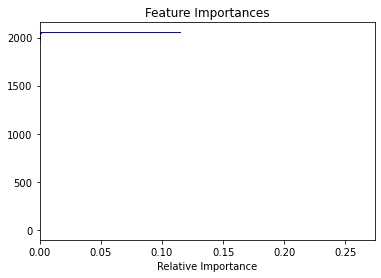

In [50]:
importances = clf.feature_importances_
indices = np.argsort(importances)

#df.max().nlargest(10)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
#plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Since feature importance refers to techniques that assign a score to input features based on how useful they are at predicting a target variable. We can see that our feature importance is relatively weak in starter name, trainer, jockey and sire variables. The distance and surface, however, both type of variables have a relatively larger number of feature importance.

In the future we can specifically train each set of data using distance as the benchmark to divide the dataset.

Overall the result from this project shows that the method of classification is better for classifying a fixed item instead of a continous range. The problem with classifying the variable of "time" is that it can only predict a certain range of time with given inputs but the classification cannot give a fixed prediction (e.g. an outcome like 1:30:05 minutes). The correlation among all variables for horse race might also be statistically insignificant to which the Random Forest Model cannot find the correlation to give an relative accurate output. 

If we were to expand the project, we should try to use deep learning/neural network to find the hidden layer with finite number of hidden nodes. This would better predict the relationship between variables as well as having a more accurate prediction in terms of time using Time Series Forecasting.

## 7. Reference

Aspen, S. (2020, November 19). My journey applying AI to horse racing - Towards Data Science. Medium. https://towardsdatascience.com/applying-ai-to-horse-racing-e3632a7e7c92